In [133]:
import numpy as np
import matplotlib.pyplot as plt

In [134]:
#Données
r1=[3, 5, 2, 7, 7, 2, 5, 3, 5, 11, 6, 6, 11, 4, 4, 2, 8, 8, 6, 5, 15, 4, 9, 9,
 4, 12, 8, 8, 6, 8, 12, 4, 7, 16, 12, 9, 4, 7, 8, 11, 5, 12, 8, 17, 9, 3, 2,
 7, 6, 5, 11, 14, 13, 8, 6, 4, 8, 4, 8, 7, 15, 15, 9, 9, 5, 6, 3, 9, 12, 14,
 16, 17, 8, 8, 9, 5, 9, 11, 6, 14, 21, 16, 6, 9, 8, 9, 8, 4, 11, 11, 6, 9,
 4, 4, 9, 9, 10, 14, 6, 3, 4, 6, 10, 4, 3, 3, 10, 4, 10, 5, 4, 3, 13, 1, 7,
 5, 7, 6, 3, 7]

n1=[28, 21, 32, 35, 35, 38, 30, 43, 49, 53, 31, 35, 46, 53, 61, 40, 29, 44, 52,
 55, 61, 31, 48, 44, 42, 53, 56, 71, 43, 43, 43, 40, 44, 70, 75, 71, 37, 31,
 42, 46, 47, 55, 63, 91, 43, 39, 35, 32, 53, 49, 75, 64, 69, 64, 49, 29, 40,
 27, 48, 43, 61, 77, 55, 60, 46, 28, 33, 32, 46, 57, 56, 78, 58, 52, 31, 28,
 46, 42, 45, 63, 71, 69, 43, 50, 31, 34, 54, 46, 58, 62, 52, 41, 34, 52, 63,
 59, 88, 62, 47, 53, 57, 74, 68, 61, 45, 45, 62, 73, 53, 39, 45, 51, 55, 41,
 53, 51, 42, 46, 54, 32]

r0=[0, 2, 2, 1, 2, 0, 1, 1, 1, 2, 4, 4, 2, 1, 7, 4, 3, 5, 3, 2, 4, 1, 4, 5, 2,
 7, 5, 8, 2, 3, 5, 4, 1, 6, 5, 11, 5, 2, 5, 8, 5, 6, 6, 10, 7, 5, 5, 2, 8,
 1, 13, 9, 11, 9, 4, 4, 8, 6, 8, 6, 8, 14, 6, 5, 5, 2, 4, 2, 9, 5, 6, 7, 5,
 10, 3, 2, 1, 7, 9, 13, 9, 11, 4, 8, 2, 3, 7, 4, 7, 5, 6, 6, 5, 6, 9, 7, 7,
 7, 4, 2, 3, 4, 10, 3, 4, 2, 10, 5, 4, 5, 4, 6, 5, 3, 2, 2, 4, 6, 4, 1]

n0=[28, 21, 32, 35, 35, 38, 30, 43, 49, 53, 31, 35, 46, 53, 61, 40, 29, 44, 52,
 55, 61, 31, 48, 44, 42, 53, 56, 71, 43, 43, 43, 40, 44, 70, 75, 71, 37, 31,
 42, 46, 47, 55, 63, 91, 43, 39, 35, 32, 53, 49, 75, 64, 69, 64, 49, 29, 40,
 27, 48, 43, 61, 77, 55, 60, 46, 28, 33, 32, 46, 57, 56, 78, 58, 52, 31, 28,
 46, 42, 45, 63, 71, 69, 43, 50, 31, 34, 54, 46, 58, 62, 52, 41, 34, 52, 63,
 59, 88, 62, 47, 53, 57, 74, 68, 61, 45, 45, 62, 73, 53, 39, 45, 51, 55, 41,
 53, 51, 42, 46, 54, 32]

year=[-10, -9, -9, -8, -8, -8, -7, -7, -7, -7, -6, -6, -6, -6, -6, -5, -5, -5,
 -5, -5, -5, -4, -4, -4, -4, -4, -4, -4, -3, -3, -3, -3, -3, -3, -3, -3, -2,
 -2, -2, -2, -2, -2, -2, -2, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6,
 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 9, 9, 10]

In [135]:
#Fonctions utiles:
def sigm(x):
    return 1/(1+np.exp(-x))
def p0(mu):
    return sigm(mu)
def p1(mu,alpha,beta1,beta2,b,year):
    return sigm(mu+alpha+beta1*year+beta2*(year**2-22)+b)
def R1(alpha,beta1,beta2,mu,b):
    r=0 #vraisemblance r1
    for i in range(K):
        r+=r1[i]*np.log(p1(mu[i],alpha,beta1,beta2,b[i],year[i]))+(n1[i]-r1[i])*np.log(1-p1(mu[i],alpha,beta1,beta2,b[i],year[i]))
    return r

def R0(alpha,beta1,beta2,mu,b):
    r=0 #vraisemblance r1
    for i in range(K):
        r+=r0[i]*np.log(p0(mu[i]))+(n0[i]-r0[i])*np.log(1-p0(mu[i]))
    return r
    
n=10000 #Nombre d'itérations de l'échantilloneur
K=120 #Nombre de "strates"


#Echantilloneur:
def GibbsSampler(n,std_dev,alpha,beta1,beta2,sigma,mu,b):
    X=np.zeros((n+1,4)) #Alpha,Beta1,Beta2 et sigma
    Xmu=np.zeros((n+1,K))
    Xb=np.zeros((n+1,K))
    #Initialisatiion
    X[0]=[alpha,beta1,beta2,sigma]
    Xmu[0]=mu
    Xb[0]=b
    for j in range(n):
        #Mise à jour alpha
        X[j+1]=X[j]
        Xp=X[j+1][0]+std_dev[0]*np.random.normal() #propoisition alpha
        top0=-Xp**2/2000 #loi a priori
        top1=R1(Xp,X[j+1][1],X[j+1][2],Xmu[j+1],Xb[j+1])
        top=top0+top1
        bottom0=-X[j+1][0]**2/2000 #loi a priori
        bottom1=R1(X[j+1][0],X[j+1][1],X[j+1][2],Xmu[j+1],Xb[j+1]) #vraisemblance
        bottom=bottom0+bottom1
        prob=np.exp(top-bottom)
        if np.random.uniform()<prob:
            X[j+1][0]=Xp
            
        #Mise à jour beta1
        Xp=X[j+1][1]+std_dev[1]*np.random.normal() #propoisition beta1
        top0=-Xp**2/2000 #loi a priori
        top1=R1(X[j+1][0],Xp,X[j+1][2],Xmu[j+1],Xb[j+1])
        top=top0+top1
        bottom0=-X[j+1][1]**2/2000 #loi a priori
        bottom1=R1(X[j+1][0],X[j+1][1],X[j+1][2],Xmu[j+1],Xb[j+1]) #vraisemblance
        bottom=bottom0+bottom1
        prob=np.exp(top-bottom)
        if np.random.uniform()<prob:
            X[j+1][1]=Xp
            
        #Mise à jour beta2
        Xp=X[j+1][2]+std_dev[2]*np.random.normal() #propoisition beta2
        top0=-Xp**2/2000 #loi a priori
        top1=R1(X[j+1][0],X[j+1][1],Xp,Xmu[j+1],Xb[j+1])
        top=top0+top1
        bottom0=-X[j+1][2]**2/2000 #loi a priori
        bottom1=R1(X[j+1][0],X[j+1][1],X[j+1][2],Xmu[j+1],Xb[j+1]) #vraisemblance
        bottom=bottom0+bottom1
        prob=np.exp(top-bottom)
        if np.random.uniform()<prob:
            X[j+1][2]=Xp
        
        #Mise à jour sigma
        Xp=X[j+1][3]*np.random.lognormal()
        top=-2.002*np.log(Xp)-0.001/Xp**2-np.sum(np.array(b)**2)/(2*Xp**2)
        bottom=-2.002*np.log(X[j+1][3])-0.001/X[j+1][3]**2-np.sum(np.array(b)**2)/(2*X[j+1][3]**2)
        prob=np.exp(top-bottom)*Xp/X[j+1][3]
        if np.random.uniform()<prob:
            X[j+1][3]=Xp
        
        #Mise à jour mu
        Xmu[j+1]=Xmu[j]
        for k in range(K):
            Xp=Xmu[j+1][k]+std_dev[4]*np.random.normal() #propoisition mu
            Xmup=Xmu[j+1].copy()
            Xmup[k]=Xp
            top0=-Xp**2/2000 #loi a priori mu
            top1=R0(X[j+1][0],X[j+1][1],X[j+1][2],Xmup,Xb[j+1])+R1(X[j+1][0],X[j+1][1],X[j+1][2],Xmup,Xb[j+1])
            top=top0+top1
            bottom0=-Xmu[j+1][k]**2/2000 #loi a priori
            bottom1=R0(X[j+1][0],X[j+1][1],X[j+1][2],Xmu[j+1],Xb[j+1])+R1(X[j+1][0],X[j+1][1],X[j+1][2],Xmu[j+1],Xb[j+1])
            bottom=bottom0+bottom1
            prob=np.exp(top-bottom)
            if np.random.uniform()<prob:
                Xmu[j+1][k]=Xp
        
        #Mise à jour b
        Xb[j+1]=Xb[j]
        for k in range(K):
            Xp=Xb[j+1][k]+std_dev[5]*np.random.normal() #propoisition b
            Xbp=Xb[j+1].copy()
            Xbp[k]=Xp
            top0=-Xp**2/2000 #loi a priori b
            top1=R1(X[j+1][0],X[j+1][1],X[j+1][2],Xmu[j+1],Xbp)
            top=top0+top1
            bottom0=-Xmu[j+1][k]**2/2000 #loi a priori
            bottom1=R1(X[j+1][0],X[j+1][1],X[j+1][2],Xmu[j+1],Xb[j+1])
            bottom=bottom0+bottom1
            prob=np.exp(top-bottom)
            if np.random.uniform()<prob:
                Xb[j+1][k]=Xp
    return X,Xmu,Xb

In [136]:
std_dev=[0.1,0.01,0.004,0.1,1,1] #Variance des propositions

#Valeurs initiales:
alpha=-1.7
beta1=0
beta2=0
mu=[0]*K
b=[0]*K
sigma=0.1
n=1000
X,Xmu,Xb=GibbsSampler(n,std_dev,alpha,beta1,beta2,sigma,mu,b)

In [137]:
Xb=Xb.transpose()
X=np.transpose(X)
Xmu=Xmu.transpose()

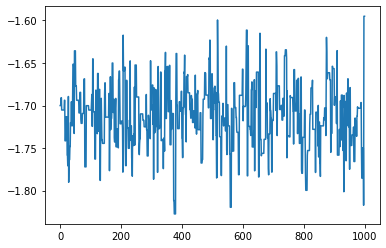

In [138]:
plt.plot(X[0])

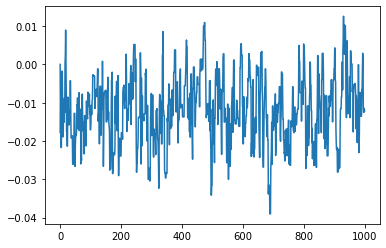

In [139]:
plt.plot(X[1])

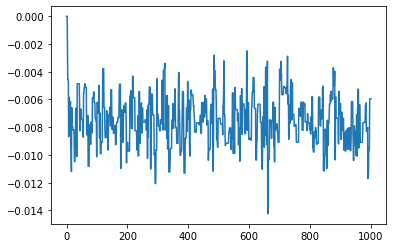

In [140]:
plt.plot(X[2])

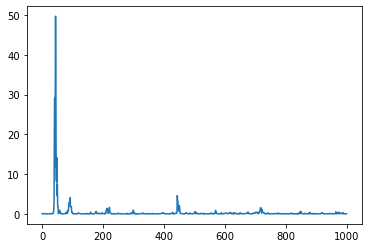

In [141]:
plt.plot(X[3])

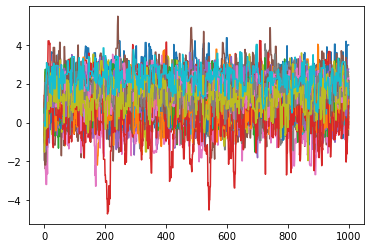

In [142]:
for i in range(120):
    plt.plot(Xb[i])

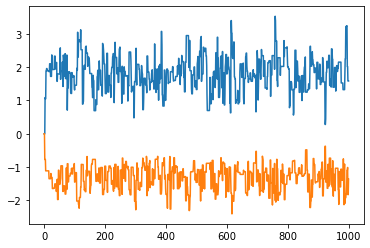

In [143]:
plt.plot(Xb[4])
plt.plot(Xmu[4])

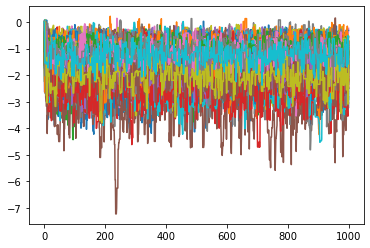

In [144]:
for i in range(120):
    plt.plot(Xmu[i])

In [145]:
for i in range(120):
    print(sigm(Xmu[i][-1]))

0.03863529227328347
0.3114337958549985
0.07634382953367383
0.25696692974766994
0.20420887149008754
0.05674214082162801
0.08841434130511426
0.06439065925509428
0.10583894523072263
0.22025911199205586
0.22112465762212152
0.23035271397503274
0.19094536718178456
0.07503419243690329
0.16380269566840744
0.13639048111151592
0.4402747000291147
0.2700373431352992
0.15480286510688354
0.06907764104203534
0.2684297650575854
0.10337979472518963
0.20460251231434048
0.23692969761938176
0.08732689966803028
0.2190524024033021
0.15937872942280812
0.12976734149062621
0.25485266618867936
0.23427364809432416
0.3180900347818662
0.23555076310018894
0.11352716337813504
0.32866098415216066
0.13877821069068896
0.1816658886801379
0.14060011287881413
0.29337681559169276
0.18007007361652513
0.3578654464766381
0.2114761596141653
0.23206092431288602
0.14341433559635966
0.22738648285652363
0.22901986786710046
0.1880781979975077
0.14908610780204476
0.14610380502183012
0.16546983014270608
0.07561738759085904
0.26251536

In [146]:
for i in range(120):
    print("proba réelle: ",r1[i]/n1[i])
    print("proba modèle (moyenne a posteriori: ): ",sigm(np.mean(X[0])+np.mean(Xmu[i])+np.mean(X[1])*year[i]+np.mean(X[2])*(year[i]**2-22)+np.mean(Xb[i])))

proba réelle:  0.10714285714285714
proba modèle (moyenne a posteriori: ):  0.08532570187014071
proba réelle:  0.23809523809523808
proba modèle (moyenne a posteriori: ):  0.21732820815380077
proba réelle:  0.0625
proba modèle (moyenne a posteriori: ):  0.048497543483246676
proba réelle:  0.2
proba modèle (moyenne a posteriori: ):  0.19252092818729957
proba réelle:  0.2
proba modèle (moyenne a posteriori: ):  0.19334346458623516
proba réelle:  0.05263157894736842
proba modèle (moyenne a posteriori: ):  0.03590073653643165
proba réelle:  0.16666666666666666
proba modèle (moyenne a posteriori: ):  0.14634165497892224
proba réelle:  0.06976744186046512
proba modèle (moyenne a posteriori: ):  0.059489649354940916
proba réelle:  0.10204081632653061
proba modèle (moyenne a posteriori: ):  0.09132694198728164
proba réelle:  0.20754716981132076
proba modèle (moyenne a posteriori: ):  0.19758961458340946
proba réelle:  0.1935483870967742
proba modèle (moyenne a posteriori: ):  0.1746519454652823
